# NetworkX for Network Analysis

NetworkX project begins with importing the module "networkx" as nx(as per the conevention).

In [139]:
import networkx as nx

# Create a Graph
## Undirected  graph

In [140]:
G=nx.Graph()

# Directed Graph

In [141]:
G = nx.DiGraph()

# Convert a Diagraph into Undirected graph

In [142]:
F = nx.Graph() #F is undirected here

> However, one should remember that the original diagraph and the converted undirected graph are different.


# Multigraphs

They are like undirected graphs, but can have paralled edges between same nodes. The parallel edges may represent different relationships between the nodes.

In [143]:
G = nx.MultiGraph()

# Directed Multigraph

Directed graphs with multiple parallel edges.

In [144]:
G = nx.MultiDiGraph()

# Add or Remove Nodes and Edges

NetworkX provides several mechanisms for adding nodes and edges to an
existing graph: one by one, from a list or another graph. Likewise, you can
remove nodes or edges one by one or by using a list. Node and edge manipulations are subject to the following rules:

• Adding an edge to a graph also ensures that its ends are added if they
did not exist before.

• Adding a duplicate node or edge is silently ignored unless the graph is a
multigraph; in the latter case, an additional parallel edge is created.

• Removing an edge does not remove its end nodes.

• Removing a node removes all incident edges.

• Removing a single non-existent node or edge raises a NetworkXError exception,
but if the node or edge is a part of a list, then an error is silently ignored.

We will use our own fictional data to build the network of foods and nutrients, and we will use every method of adding nodes mentioned above.

In [145]:
G = nx.Graph([("A", "eggs"),])
G.add_node("spinach") # Add a single node
G.add_node("Hg") # Add a single node by mistake
G.add_nodes_from(["folates", "asparagus", "liver"]) # Add a list of nodes
G.add_edge("spinach", "folates") # Add one edge, both ends exist
G.add_edge("spinach", "heating oil") # Add one edge by mistake
G.add_edge("liver", "Se") # Add one edge, one end does not exist
G.add_edges_from([("folates", "liver"), ("folates", "asparagus")])

To demonstrate how to remove certain nodes from a graph, we added some nodes that are irrelevant to our graph. Now, we will remove all those nodes using the methods disussed above.

In [146]:
G.remove_node("Hg")
G.remove_nodes_from(["Hg",]) # Safe to remove a missing node using a list
G.remove_edge("spinach", "heating oil")
G.remove_edges_from([("spinach", "heating oil"), ]) # See above
G.remove_node("heating oil") # Not removed yet

**We can use the method *G.clear()* to delete each grph nodes and corresponding edges at once, but this still keeps the graph shell.**

# Exploring nodes and edge lists

To access nodes and edges of a graph, there are two objects and two methods i.e **G.nodes** and **G.edges** which stores the nodes and the edges as lists and then we have methods G.nodes() and G.edges(). The methods return node and edge lists if called without any parameters.



In [147]:
print(G.nodes) #Printing object
print(G.edges)
print(G.nodes())# calling the methods
print(G.edges())

['A', 'eggs', 'spinach', 'folates', 'asparagus', 'liver', 'Se']
[('A', 'eggs'), ('spinach', 'folates'), ('folates', 'liver'), ('folates', 'asparagus'), ('liver', 'Se')]
['A', 'eggs', 'spinach', 'folates', 'asparagus', 'liver', 'Se']
[('A', 'eggs'), ('spinach', 'folates'), ('folates', 'liver'), ('folates', 'asparagus'), ('liver', 'Se')]


We can use the optional parameter *data=True* to get the lists with the additional attribute.

In [148]:
print(G.nodes(data=True))

[('A', {}), ('eggs', {}), ('spinach', {}), ('folates', {}), ('asparagus', {}), ('liver', {}), ('Se', {})]


In [149]:
print(G.edges(data=True))

[('A', 'eggs', {}), ('spinach', 'folates', {}), ('folates', 'liver', {}), ('folates', 'asparagus', {}), ('liver', 'Se', {})]


In orer to find the number of nodes and edges, we can measure the length of the returned lists or dictionaries. **len(G)** function can also be used for the number of nodes in G  as a quick fix.

In [150]:
print(len(G)) #number of nodes in G

7


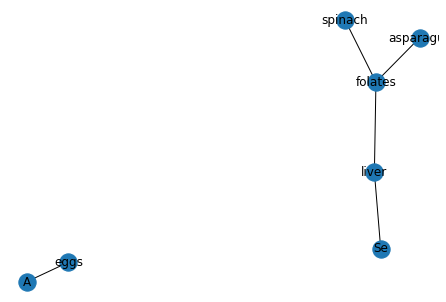

In [151]:
nx.draw(G,with_labels = True)#draw the network

# Read as Network data from a CSV

Most of the times our network data would be stored in popular data format, such as CSV files. We need to access the CSV file and read the network data and construct the graph object.

We will use some python magic to open the csv file, then read the data from it. We have used *nutrients.csv* file, which is stored at the desired location on hard dirve.

It takes oly three lines of code to open the edge list file, create a CSV reader for the file, and put the list of pairs into the *Graph* constructor.

In [152]:
import networkx as nx
import matplotlib.pyplot as plt
import csv

with open("nutrients.csv") as infile:
    csv_reader = csv.reader(infile)
    G=nx.Graph(csv_reader)
print(G.nodes())
print("\n",G.edges)

['A', 'carrots', 'eggs', 'fatty fish', 'green leafy vegs', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', 'whole grains', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', 'veg oils', 'yogurt']

 [('A', 'carrots'), ('A', 'eggs'), ('A', 'fatty fish'), ('A', 'green leafy vegs'), ('A', 'liver'), ('A', 'milk'), ('A', 'tomatoes'), ('carrots', 'C'), ('eggs', 'B12'), ('eggs', 'riboflavin'), ('fatty fish', 'B6'), ('fatty fish', 'D'), ('fatty fish', 'B12'), ('fatty fish', 'niacin'), ('green leafy vegs', 'Mn'), ('green leafy vegs', 'C'), ('green leafy vegs', 'Ca'), ('green leafy vegs', 'E'), ('green leafy vegs', 'riboflavin'), ('liver', 'B6'), ('liver', 'Cu'), ('liver', 'folates'), ('liver', 'Se'), ('liver', 'Zn'), ('milk', 'B12'), ('milk', 'D'), ('milk', 'Ca'), ('milk', 'riboflavin'), ('tom

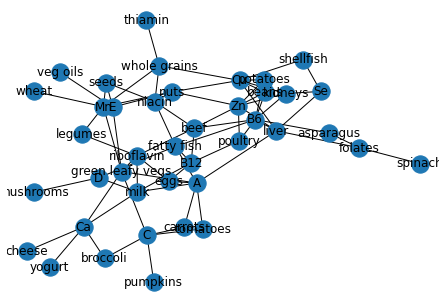

In [153]:
nx.draw(G,with_labels=True)

We can use a function class to find out number of self-loops in the network.

In [154]:
nx.number_of_selfloops(G) #find out number of self loops

1

We can add a selfloop to the network by using the *G.add_edge()* method by passing the names of a node as a list i.e *('tomatoes','tomatoes')*.

In [155]:
G.add_edge('tomatoes','tomatoes')

Now we can *list(nx.selfloop_edges())* with parameter G,  to get the self loop in form of a list as above. We store this list under a object and then use *print command* to display the self loop edges.

In [156]:
loops=list(nx.selfloop_edges(G))
print(loops)

[('tomatoes', 'tomatoes')]


We can also remove the self-llops using the *loops* object as the parameter of

In [157]:
G.remove_edges_from(loops) #Remove the loops from the object
loops=list(nx.selfloop_edges(G)) #create a list of selfloop edges
print(loops) #Display the list which is now empty in the output

[]


# Relabel nodes

Our network looks promising but it can use some cosmetic manipulation to make it look better. We can capitalize all node names. *NetworkX* provides method *nx.relabel_nodes()* that takes parameters as graph(G) and a dictionary of old and new labels and either gives a copy of the graph *(copy=True, default)* or modifies the graph itself *(copy=False)*.

We will use dictionary comprehension to iterate over all network nodes and convert those labeled with strings to the title case using *str.title()* method.

In [158]:
mapping = {node: node.title() for node in G if isinstance(node, str)} #create a dictionary via iterating over all nodes in g and also capitalize the first letter using .title() if the node label is a string
nx.relabel_nodes(G, mapping, copy=False) #use networkx method to relable the nodes with capitalized first letter labels
print(G.nodes()) #print updated node labels as lists

['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'Carrots', 'Eggs', 'Fatty Fish', 'Green Leafy Vegs', 'Liver', 'Milk', 'Tomatoes', 'Asparagus', 'Beans', 'Kidneys', 'Potatoes', 'Pumpkins', 'Broccoli', 'Cheese', 'Nuts', 'Whole Grains', 'Mushrooms', 'Seeds', 'Legumes', 'Wheat', 'Beef', 'Riboflavin', 'Niacin', 'Folates', 'Spinach', 'Poultry', 'Shellfish', 'Thiamin', 'Veg Oils', 'Yogurt']


If you noticed that G acts as a node iterator in above snippet. G also has some other *dict()* features. For example, we can also use *selection operator[]* to access the edges incident to the node, and their attributes

In [159]:
print(G["Zn"]) #returns a dictionary with node labels related to Zn

{'Liver': {}, 'Beans': {}, 'Kidneys': {}, 'Potatoes': {}, 'Nuts': {}, 'Beef': {}, 'Poultry': {}}


Our network does not have any attributes yet. We can now add some.